In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# train_data1 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_1.csv").fillna(0)
train_data2 = pd.read_csv("D:\\Personal\\Msc\\Y1S1\\Advanced Data Mining\\GroupAssignment\\web-traffic-time-series-forecasting\\TrainingData\\train_2.csv")

In [3]:
train_data2.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [4]:
# Transpose rows and columns
df = train_data2.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.reset_index()
df.head()

,index,0,1,2,3,4,5,6,7,8,...,145053,145054,145055,145056,145057,145058,145059,145060,145061,145062
0,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Capture 1st rows of data and make it column header
column_header = df.iloc[0,:].values

df.columns = column_header

df.head()

,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
0,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_al...,Legión_(serie_de_televisión)_es.wikipedia.org_...,Doble_tentación_es.wikipedia.org_all-access_sp...,Mi_adorable_maldición_es.wikipedia.org_all-acc...,Underworld_(serie_de_películas)_es.wikipedia.o...,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,Francisco_el_matemático_(serie_de_televisión_d...
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop 1st row
df = df.drop(0, axis = 0)
df.head()

,Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Rename Page column to Date column
df = df.rename(columns = {"Page" : "Date"})

df.head()

,Date,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
1,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Check data type of date column
print(df["Date"].dtype)

object


In [10]:
# Convert Date column to datetime datatype
df["Date"] = pd.to_datetime(df["Date"])

In [11]:
# Check Date column datatype again
print(df["Date"].dtype)

datetime64[ns]


In [12]:
# Set Date column as index
df = df.set_index("Date")

In [13]:
df.head()

,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Finding number of access types and agents
access_types = []
agents = []
for column in df.columns:
    access_type = column.split("_")[-2]
    agent = column.split("_")[-1]
    access_types.append(access_type)
    agents.append(agent)

In [15]:
# Counting access types
from collections import Counter
access_dict = Counter(access_types)
access_dict

Counter({'all-access': 74315, 'desktop': 34809, 'mobile-web': 35939})

In [16]:
print("Number of topics with all-access type:", access_dict["all-access"])
print("Number of topics with desktop access:", access_dict["desktop"])
print("Number of topics with mobile-web access:", access_dict["mobile-web"])

Number of topics with all-access type: 74315
Number of topics with desktop access: 34809
Number of topics with mobile-web access: 35939


In [17]:
access_df = pd.DataFrame({"Access type" : access_dict.keys(),
                          "Number of columns" : access_dict.values()})
access_df

,Access type,Number of columns
0,all-access,74315
1,desktop,34809
2,mobile-web,35939


In [18]:
# Counting agents
agents_dict = Counter(agents)
agents_dict

Counter({'spider': 34913, 'all-agents': 110150})

In [19]:
print("Number of topics with spider as agent:", agents_dict["spider"])
print("Number of topics with all-agents as agent:", agents_dict["all-agents"])

Number of topics with spider as agent: 34913
Number of topics with all-agents as agent: 110150


In [20]:
agents_df = pd.DataFrame({"Agent" : agents_dict.keys(),
                          "Number of columns" : agents_dict.values()})
agents_df

,Agent,Number of columns
0,spider,34913
1,all-agents,110150


In [21]:
# Identifying number of columns with null values with respect to access type
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(access_type) for access_type in access_df["Access type"]]

access_df["No of columns with nulls"] = no_of_cols_with_nulls

access_df

,Access type,Number of columns,No of columns with nulls
0,all-access,74315,16707
1,desktop,34809,6801
2,mobile-web,35939,6471


In [22]:
# Identifying number of columns with null values with respect to access type
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(access_type) for access_type in access_df["Access type"]]

access_df["No of columns with nulls"] = no_of_cols_with_nulls

access_df



,Access type,Number of columns,No of columns with nulls
0,all-access,74315,16707
1,desktop,34809,6801
2,mobile-web,35939,6471


In [23]:
# Identifying number of columns with null values with respect to agents
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(agent) for agent in agents_df["Agent"]]

agents_df["No of columns with nulls"] = no_of_cols_with_nulls

agents_df

,Agent,Number of columns,No of columns with nulls
0,spider,34913,6048
1,all-agents,110150,23931


In [24]:
# Calculating percentage of null values in access types
access_df["% of nulls"] = access_df["No of columns with nulls"] / access_df["Number of columns"] * 100

access_df

# Percentage of missing values in each access type is almost same. So there is no pattern in missing values.

,Access type,Number of columns,No of columns with nulls,% of nulls
0,all-access,74315,16707,22.481329
1,desktop,34809,6801,19.538051
2,mobile-web,35939,6471,18.005509


In [25]:
# Calculating percentage of null values in agents
agents_df["% of nulls"] = agents_df["No of columns with nulls"] / agents_df["Number of columns"] * 100

agents_df

#Percentae of missing values is almost same with each agents. So there is no pattern in missing values.

,Agent,Number of columns,No of columns with nulls,% of nulls
0,spider,34913,6048,17.323060
1,all-agents,110150,23931,21.725828


In [26]:
df.columns[86543]

'種田梨沙_ja.wikipedia.org_desktop_all-agents'

In [27]:
df.columns[86543].split("_")[-3:]

['ja.wikipedia.org', 'desktop', 'all-agents']

In [28]:
projects = []
for column in df.columns:
    project = column.split("_")[-3] # Extracting language code from column name (topic name)
    projects.append(project)

In [29]:
project_dict = Counter(projects)
project_dict

Counter({'zh.wikipedia.org': 17229,
         'fr.wikipedia.org': 17802,
         'en.wikipedia.org': 24108,
         'commons.wikimedia.org': 10555,
         'ru.wikipedia.org': 15022,
         'www.mediawiki.org': 7300,
         'de.wikipedia.org': 18547,
         'ja.wikipedia.org': 20431,
         'es.wikipedia.org': 14069})

In [31]:
project_df = pd.DataFrame({"Project" : project_dict.keys(),
                           "Number of columns" : project_dict.values()})

project_df

,Project,Number of columns
0,zh.wikipedia.org,17229
1,fr.wikipedia.org,17802
2,en.wikipedia.org,24108
3,commons.wikimedia.org,10555
4,ru.wikipedia.org,15022
5,www.mediawiki.org,7300
6,de.wikipedia.org,18547
7,ja.wikipedia.org,20431
8,es.wikipedia.org,14069


In [32]:
# Identifying number of columns with null values with respect to projects
def count_null_columns(pattern):
    pattern_columns = [column for column in df.columns if pattern in column]
    return len(df[pattern_columns].isnull().sum()[df[pattern_columns].isnull().sum() > 0])

no_of_cols_with_nulls = [count_null_columns(project) for project in project_df["Project"]]

project_df["No of columns with nulls"] = no_of_cols_with_nulls

project_df

,Project,Number of columns,No of columns with nulls
0,zh.wikipedia.org,17229,4070
1,fr.wikipedia.org,17802,2042
2,en.wikipedia.org,24108,7428
3,commons.wikimedia.org,10555,5435
4,ru.wikipedia.org,15022,1590
5,www.mediawiki.org,7300,3664
6,de.wikipedia.org,18547,2402
7,ja.wikipedia.org,20431,2052
8,es.wikipedia.org,14069,1296


In [33]:
# Calculating percentage of null values
project_df["% of nulls"] = project_df["No of columns with nulls"] / project_df["Number of columns"] * 100

project_df

,Project,Number of columns,No of columns with nulls,% of nulls
0,zh.wikipedia.org,17229,4070,23.622961
1,fr.wikipedia.org,17802,2042,11.470621
2,en.wikipedia.org,24108,7428,30.811349
3,commons.wikimedia.org,10555,5435,51.492184
4,ru.wikipedia.org,15022,1590,10.584476
5,www.mediawiki.org,7300,3664,50.191781
6,de.wikipedia.org,18547,2402,12.950882
7,ja.wikipedia.org,20431,2052,10.043561
8,es.wikipedia.org,14069,1296,9.211742


In [34]:
project_df.sort_values(by = "% of nulls", ascending = False)

,Project,Number of columns,No of columns with nulls,% of nulls
3,commons.wikimedia.org,10555,5435,51.492184
5,www.mediawiki.org,7300,3664,50.191781
2,en.wikipedia.org,24108,7428,30.811349
0,zh.wikipedia.org,17229,4070,23.622961
6,de.wikipedia.org,18547,2402,12.950882
1,fr.wikipedia.org,17802,2042,11.470621
4,ru.wikipedia.org,15022,1590,10.584476
7,ja.wikipedia.org,20431,2052,10.043561
8,es.wikipedia.org,14069,1296,9.211742


In [35]:
required_column_names = [column for column in df.columns if "commons.wikimedia.org" in column]

In [36]:
df[required_column_names].sum().mean()

155332.1272382757

In [37]:
df[required_column_names]

,Accueil_commons.wikimedia.org_all-access_spider,Atlas_of_Asia_commons.wikimedia.org_all-access_spider,Atlas_of_Europe_commons.wikimedia.org_all-access_spider,Atlas_of_World_War_II_commons.wikimedia.org_all-access_spider,Atlas_of_colonialism_commons.wikimedia.org_all-access_spider,Atlas_of_the_United_Kingdom_commons.wikimedia.org_all-access_spider,Atlas_of_the_United_States_commons.wikimedia.org_all-access_spider,Bikini_commons.wikimedia.org_all-access_spider,Campaign:OFBA2016_commons.wikimedia.org_all-access_spider,Catalogue_of_Wilhelm_von_Gloeden's_pictures_commons.wikimedia.org_all-access_spider,...,File:Artist’s_impression_of_the_ultracool_dwarf_star_TRAPPIST-1_from_close_to_one_of_its_planets.ogv_commons.wikimedia.org_desktop_all-agents,File:Torm_detsembris._Merivälja_Muul.jpg_commons.wikimedia.org_desktop_all-agents,File:Talv_Väike-Taevaskojas.jpg_commons.wikimedia.org_desktop_all-agents,Category:2016_Turkish_coup_d'état_attempt_commons.wikimedia.org_desktop_all-agents,File:Pokémon_Go_Release_Map.svg_commons.wikimedia.org_desktop_all-agents,Commons:Уики_обича_паметниците_2016_България_commons.wikimedia.org_desktop_all-agents,"File:Landgericht_Berlin,_Littenstraße,_Eingangshalle_(2),_160906,_ako.jpg_commons.wikimedia.org_desktop_all-agents",File:Battle_of_Mosul_(2016–2017).svg_commons.wikimedia.org_desktop_all-agents,File:Ура!.ogv_commons.wikimedia.org_desktop_all-agents,File:関東地方居住者の自治体別四年制大学卒業率.png_commons.wikimedia.org_desktop_all-agents
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,55.0,5.0,4.0,5.0,8.0,5.0,10.0,4.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,48.0,3.0,6.0,2.0,6.0,7.0,14.0,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-03,44.0,4.0,9.0,6.0,15.0,6.0,13.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-04,35.0,6.0,7.0,6.0,5.0,10.0,20.0,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-05,46.0,3.0,6.0,8.0,5.0,7.0,9.0,2.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-06,3232.0,20.0,40.0,7.0,23.0,10.0,18.0,9.0,2.0,11.0,...,7.0,4.0,4.0,6.0,9.0,3.0,36.0,12.0,1.0,3.0
2017-09-07,5853.0,23.0,39.0,13.0,20.0,15.0,27.0,4.0,NaN,8.0,...,4.0,3.0,NaN,2.0,10.0,1.0,36.0,5.0,134.0,NaN
2017-09-08,46.0,21.0,21.0,5.0,28.0,4.0,10.0,5.0,NaN,9.0,...,14.0,2.0,5.0,6.0,10.0,4.0,40.0,6.0,236.0,2.0


In [38]:
project_df["Project"]

0         zh.wikipedia.org
1         fr.wikipedia.org
2         en.wikipedia.org
3    commons.wikimedia.org
4         ru.wikipedia.org
5        www.mediawiki.org
6         de.wikipedia.org
7         ja.wikipedia.org
8         es.wikipedia.org
Name: Project, dtype: object

In [39]:
def extract_total_views(project):
    required_column_names = [column for column in df.columns if project in column]
    total_views = df[required_column_names].sum().sum()
    return total_views

In [40]:
total_views = []
for project in project_df["Project"]:
    total_views.append(extract_total_views(project))
    
total_views

[4664633534.0,
 8976475610.0,
 84132570661.0,
 1639530603.0,
 10968993525.0,
 394812434.0,
 12504767782.0,
 12092218142.0,
 13573976776.0]

In [41]:
project_df["Total views"] = total_views
project_df

,Project,Number of columns,No of columns with nulls,% of nulls,Total views
0,zh.wikipedia.org,17229,4070,23.622961,4.664634e+09
1,fr.wikipedia.org,17802,2042,11.470621,8.976476e+09
2,en.wikipedia.org,24108,7428,30.811349,8.413257e+10
3,commons.wikimedia.org,10555,5435,51.492184,1.639531e+09
4,ru.wikipedia.org,15022,1590,10.584476,1.096899e+10
5,www.mediawiki.org,7300,3664,50.191781,3.948124e+08
6,de.wikipedia.org,18547,2402,12.950882,1.250477e+10
7,ja.wikipedia.org,20431,2052,10.043561,1.209222e+10
8,es.wikipedia.org,14069,1296,9.211742,1.357398e+10


In [42]:
def extract_average_views(project):
    required_column_names = [column for column in df.columns if project in column]
    average_views = df[required_column_names].sum().mean()
    return average_views

In [43]:
average_views = []
for project in project_df["Project"]:
    average_views.append(extract_average_views(project))
    
average_views

[270743.13854547567,
 504239.726435232,
 3489819.5893894145,
 155332.1272382757,
 730195.2819198509,
 54083.89506849315,
 674220.5090850273,
 591856.4016445597,
 964814.6119837941]

In [44]:
project_df["Average views"] = average_views
project_df

,Project,Number of columns,No of columns with nulls,% of nulls,Total views,Average views
0,zh.wikipedia.org,17229,4070,23.622961,4.664634e+09,2.707431e+05
1,fr.wikipedia.org,17802,2042,11.470621,8.976476e+09,5.042397e+05
2,en.wikipedia.org,24108,7428,30.811349,8.413257e+10,3.489820e+06
3,commons.wikimedia.org,10555,5435,51.492184,1.639531e+09,1.553321e+05
4,ru.wikipedia.org,15022,1590,10.584476,1.096899e+10,7.301953e+05
5,www.mediawiki.org,7300,3664,50.191781,3.948124e+08,5.408390e+04
6,de.wikipedia.org,18547,2402,12.950882,1.250477e+10,6.742205e+05
7,ja.wikipedia.org,20431,2052,10.043561,1.209222e+10,5.918564e+05
8,es.wikipedia.org,14069,1296,9.211742,1.357398e+10,9.648146e+05


In [45]:
project_df['Total views'] = project_df['Total views'].astype('int64')
project_df['Average views'] = project_df['Average views'].astype('int64')
project_df

,Project,Number of columns,No of columns with nulls,% of nulls,Total views,Average views
0,zh.wikipedia.org,17229,4070,23.622961,4664633534,270743
1,fr.wikipedia.org,17802,2042,11.470621,8976475610,504239
2,en.wikipedia.org,24108,7428,30.811349,84132570661,3489819
3,commons.wikimedia.org,10555,5435,51.492184,1639530603,155332
4,ru.wikipedia.org,15022,1590,10.584476,10968993525,730195
5,www.mediawiki.org,7300,3664,50.191781,394812434,54083
6,de.wikipedia.org,18547,2402,12.950882,12504767782,674220
7,ja.wikipedia.org,20431,2052,10.043561,12092218142,591856
8,es.wikipedia.org,14069,1296,9.211742,13573976776,964814


In [46]:
project_df_sorted = project_df.sort_values(by = "Average views", ascending = False)
project_df_sorted

,Project,Number of columns,No of columns with nulls,% of nulls,Total views,Average views
2,en.wikipedia.org,24108,7428,30.811349,84132570661,3489819
8,es.wikipedia.org,14069,1296,9.211742,13573976776,964814
4,ru.wikipedia.org,15022,1590,10.584476,10968993525,730195
6,de.wikipedia.org,18547,2402,12.950882,12504767782,674220
7,ja.wikipedia.org,20431,2052,10.043561,12092218142,591856
1,fr.wikipedia.org,17802,2042,11.470621,8976475610,504239
0,zh.wikipedia.org,17229,4070,23.622961,4664633534,270743
3,commons.wikimedia.org,10555,5435,51.492184,1639530603,155332
5,www.mediawiki.org,7300,3664,50.191781,394812434,54083


In [47]:
import seaborn as sns


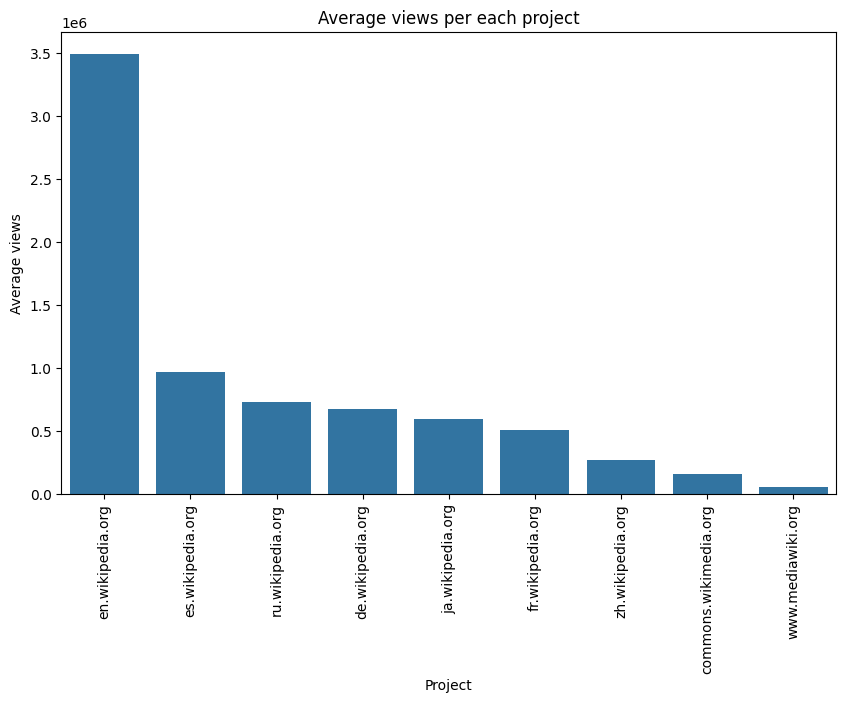

In [48]:
plt.figure(figsize = (10,6))
sns.barplot(x = project_df_sorted["Project"], y = project_df_sorted["Average views"])
plt.xticks(rotation = "vertical")
plt.title("Average views per each project")
plt.show()

In [49]:
en_wikipedia_org_columns = [column for column in df.columns if "en.wikipedia.org" in column]

top_pages_en = df[en_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_en

Main_Page_en.wikipedia.org_all-access_all-agents         21415015.457036
Main_Page_en.wikipedia.org_desktop_all-agents            16090100.917808
Main_Page_en.wikipedia.org_mobile-web_all-agents          4780633.570361
Special:Search_en.wikipedia.org_all-access_all-agents      2366706.66127
Special:Search_en.wikipedia.org_desktop_all-agents        1747445.835616
dtype: object

<Axes: xlabel='Date'>

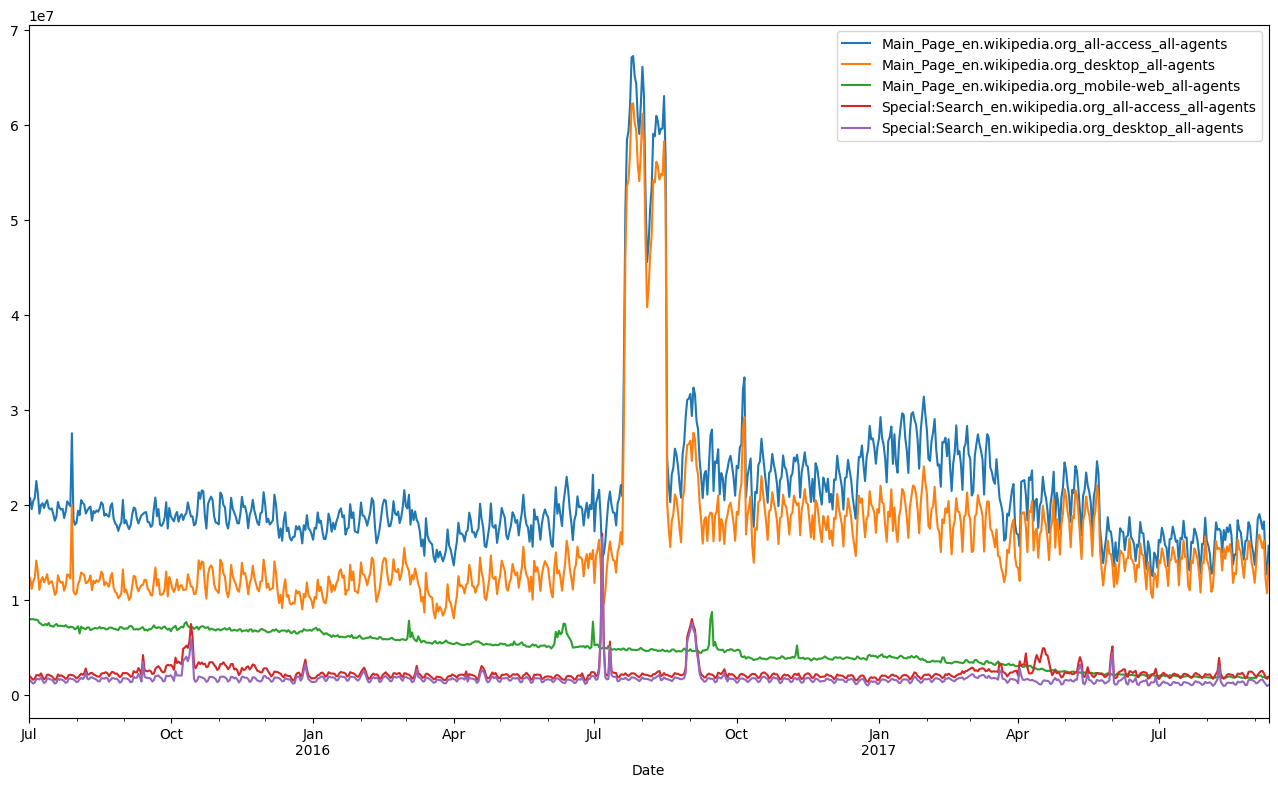

In [50]:
df[top_pages_en.index].plot(figsize = (16,9))

In [51]:
es_wikipedia_org_columns = [column for column in df.columns if "es.wikipedia.org" in column]

top_pages_es = df[es_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_es

Wikipedia:Portada_es.wikipedia.org_all-access_all-agents    1193889.835616
Wikipedia:Portada_es.wikipedia.org_mobile-web_all-agents     865097.132005
Especial:Buscar_es.wikipedia.org_all-access_all-agents       392604.788294
Wikipedia:Portada_es.wikipedia.org_desktop_all-agents        282467.316314
Especial:Buscar_es.wikipedia.org_desktop_all-agents          268519.047323
dtype: object

<Axes: xlabel='Date'>

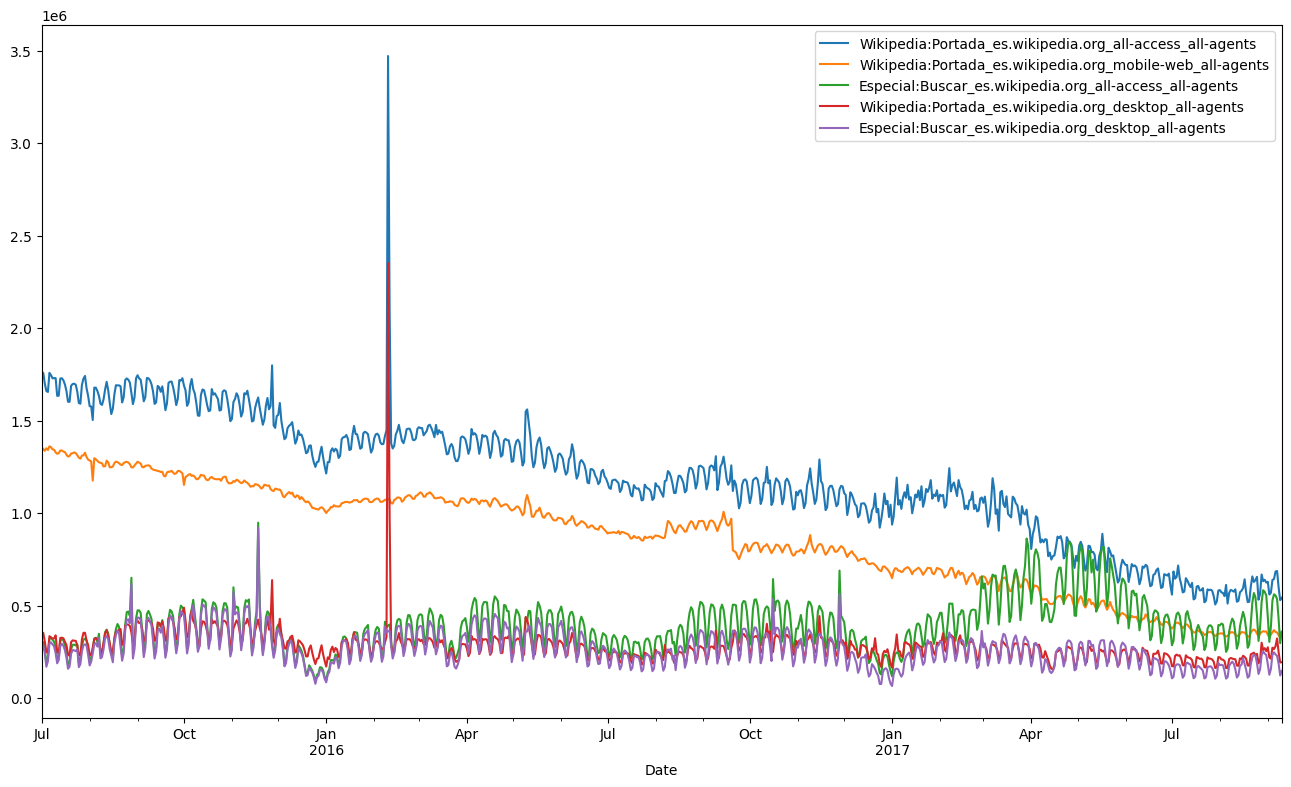

In [52]:
df[top_pages_es.index].plot(figsize = (16,9))

In [53]:
ru_wikipedia_org_columns = [column for column in df.columns if "ru.wikipedia.org" in column]

top_pages_ru = df[ru_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_ru

Заглавная_страница_ru.wikipedia.org_all-access_all-agents    1621087.283935
Заглавная_страница_ru.wikipedia.org_desktop_all-agents       1082969.713574
Заглавная_страница_ru.wikipedia.org_mobile-web_all-agents     509974.856787
Служебная:Поиск_ru.wikipedia.org_all-access_all-agents        180169.230386
xss_ru.wikipedia.org_all-access_all-agents                         178834.0
dtype: object

<Axes: xlabel='Date'>

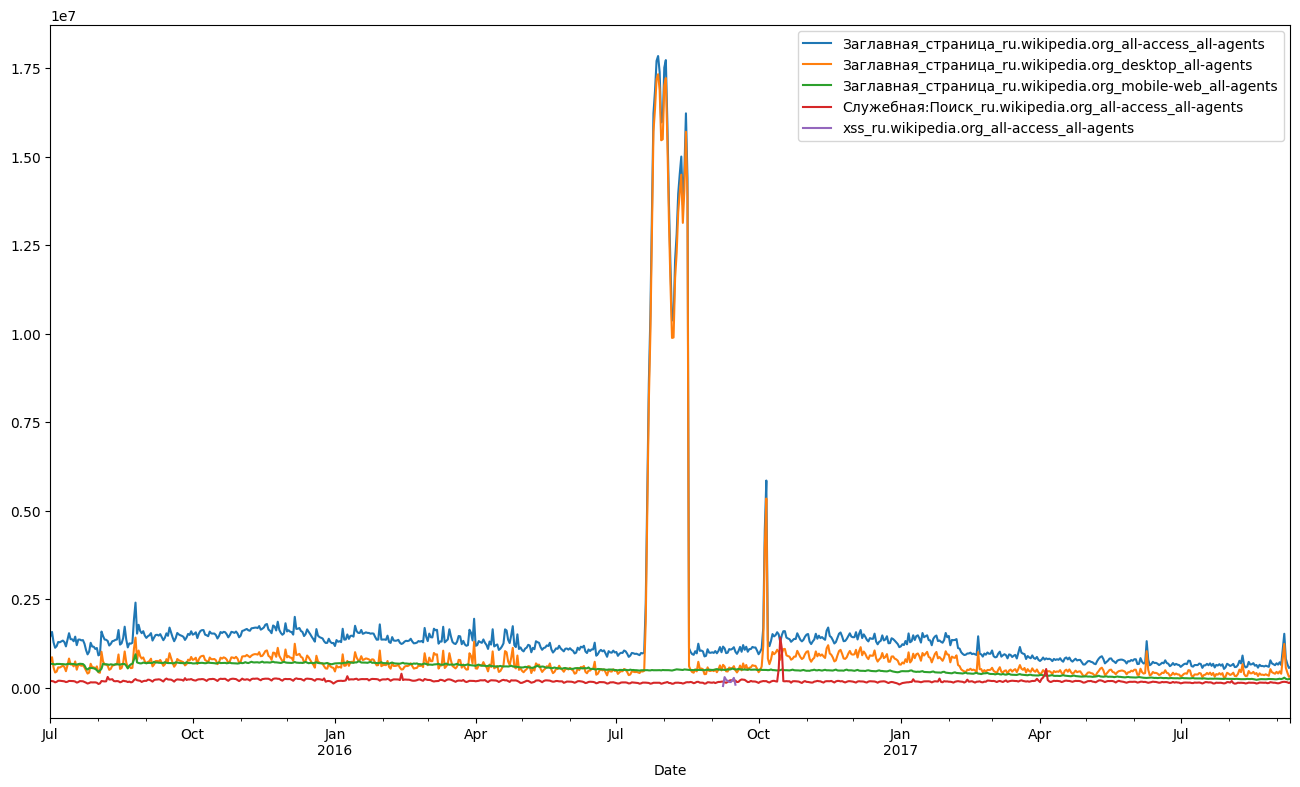

In [54]:
df[top_pages_ru.index].plot(figsize = (16,9))

In [55]:
de_wikipedia_org_columns = [column for column in df.columns if "de.wikipedia.org" in column]

top_pages_de = df[de_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_de

Wikipedia:Hauptseite_de.wikipedia.org_all-access_all-agents    2823571.054795
Wikipedia:Hauptseite_de.wikipedia.org_mobile-web_all-agents      1774385.0934
Wikipedia:Hauptseite_de.wikipedia.org_desktop_all-agents        779679.266501
Spezial:Suche_de.wikipedia.org_all-access_all-agents            394970.321295
Spezial:Suche_de.wikipedia.org_desktop_all-agents               380529.708593
dtype: object

<Axes: xlabel='Date'>

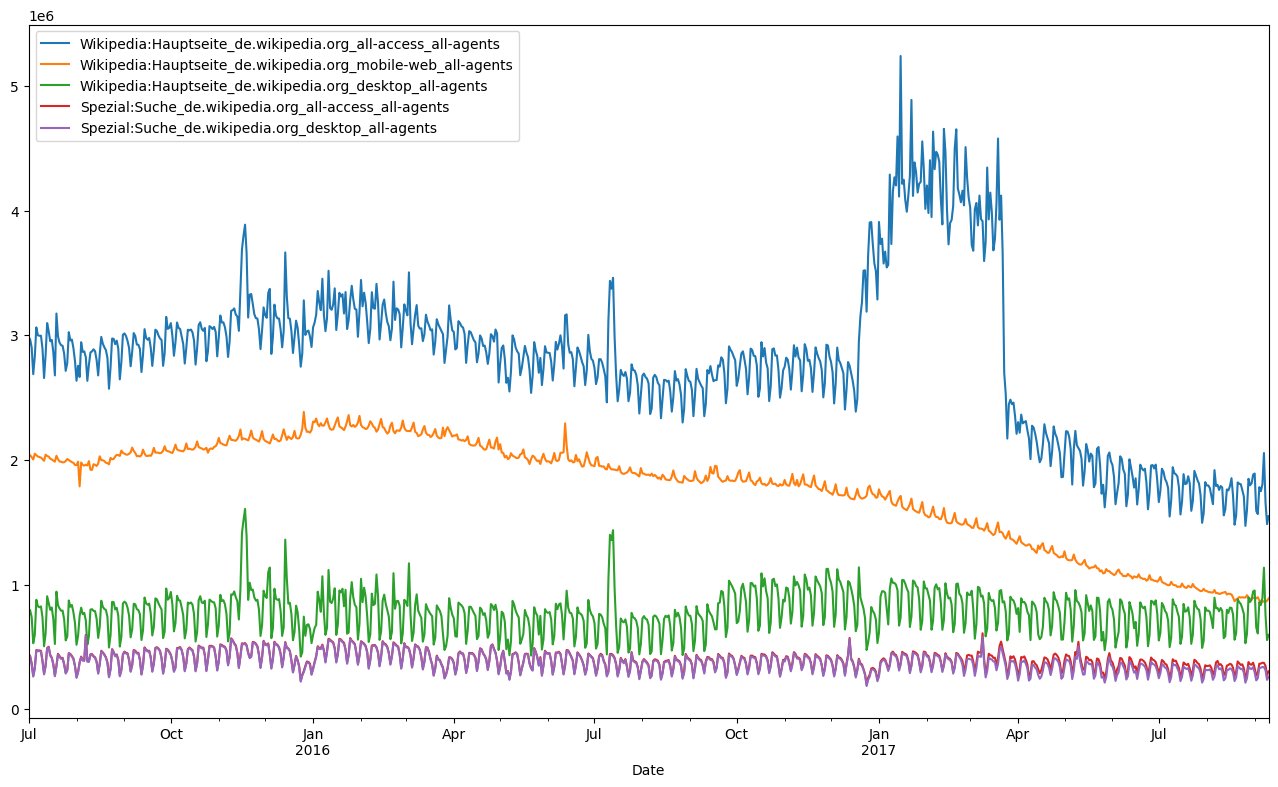

In [56]:
df[top_pages_de.index].plot(figsize = (16,9))

In [57]:
ja_wikipedia_org_columns = [column for column in df.columns if "ja.wikipedia.org" in column]

top_pages_ja = df[ja_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_ja

メインページ_ja.wikipedia.org_all-access_all-agents    401846.412204
メインページ_ja.wikipedia.org_desktop_all-agents       248167.875467
xss_ja.wikipedia.org_desktop_all-agents               138722.0
特別:検索_ja.wikipedia.org_all-access_all-agents     131630.523039
特別:検索_ja.wikipedia.org_desktop_all-agents        125706.230386
dtype: object

<Axes: xlabel='Date'>

d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12506 (\N{KATAKANA LETTER PE}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLON

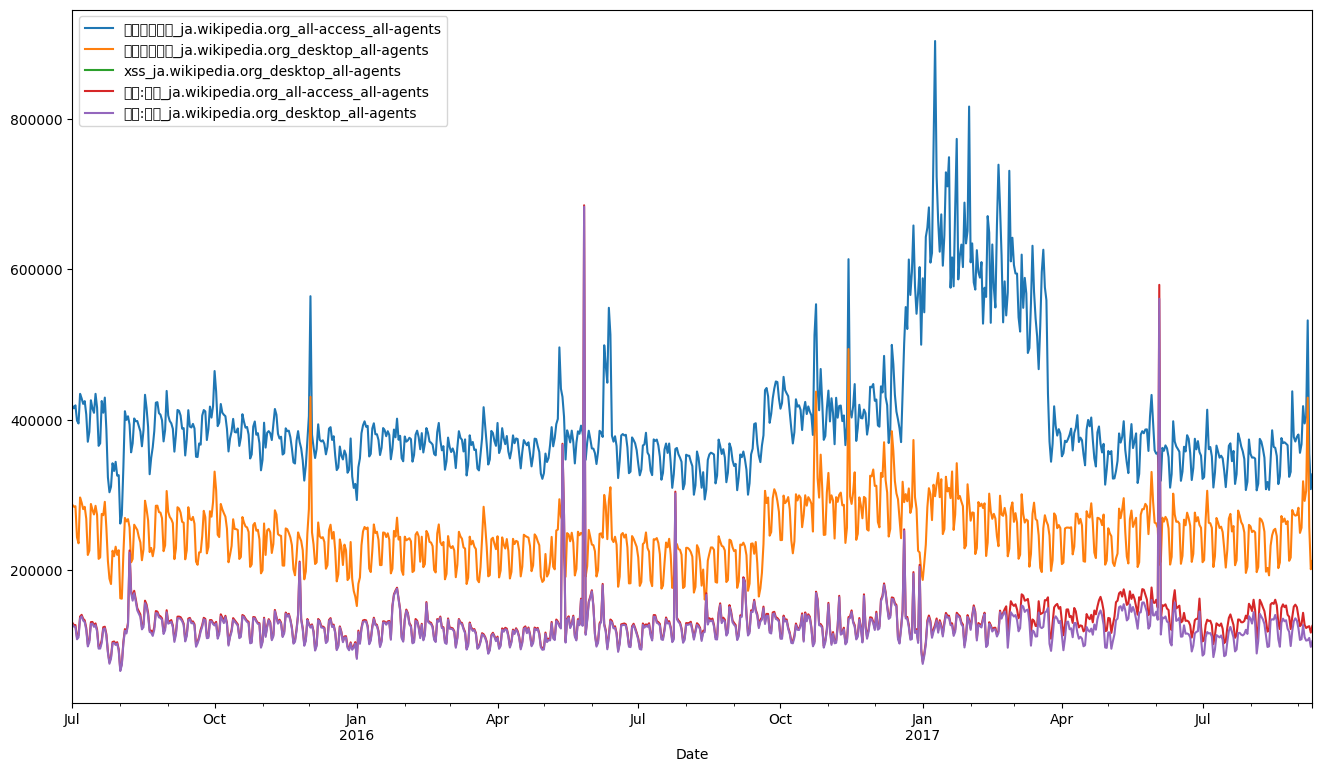

In [58]:
df[top_pages_ja.index].plot(figsize = (16,9))

In [59]:
fr_wikipedia_org_columns = [column for column in df.columns if "fr.wikipedia.org" in column]

top_pages_fr = df[fr_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_fr

Wikipédia:Accueil_principal_fr.wikipedia.org_all-access_all-agents    1433600.849315
Wikipédia:Accueil_principal_fr.wikipedia.org_mobile-web_all-agents     947017.291407
Wikipédia:Accueil_principal_fr.wikipedia.org_desktop_all-agents        414442.841843
Spécial:Recherche_fr.wikipedia.org_all-access_all-agents               176936.632628
Sp?cial:Search_fr.wikipedia.org_all-access_all-agents                   174653.14324
dtype: object

<Axes: xlabel='Date'>

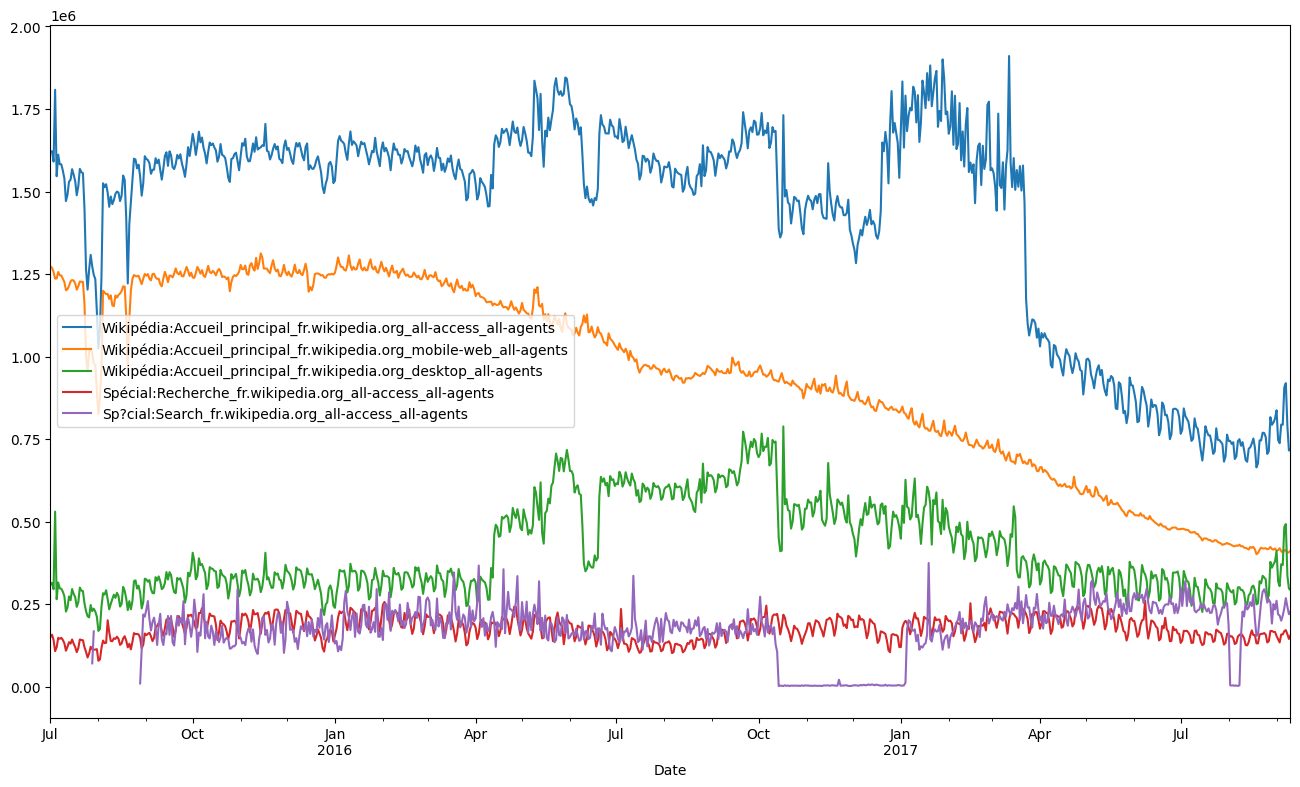

In [60]:
df[top_pages_fr.index].plot(figsize = (16,9))

In [61]:
zh_wikipedia_org_columns = [column for column in df.columns if "zh.wikipedia.org" in column]

top_pages_zh = df[zh_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_zh

Wikipedia:首页_zh.wikipedia.org_all-access_all-agents    229397.292653
Wikipedia:首页_zh.wikipedia.org_desktop_all-agents        119405.71731
Wikipedia:首页_zh.wikipedia.org_mobile-web_all-agents     93988.247821
Special:搜索_zh.wikipedia.org_all-access_all-agents       88852.108344
Special:搜索_zh.wikipedia.org_desktop_all-agents           83421.98132
dtype: object

<Axes: xlabel='Date'>

d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39318 (\N{CJK UNIFIED IDEOGRAPH-9996}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39029 (\N{CJK UNIFIED IDEOGRAPH-9875}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25628 (\N{CJK UNIFIED IDEOGRAPH-641C}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from current font.
  func(*args, **kwargs)
d:\Personal\Msc\Y1S1\Advanced Data Mining\GroupAssignment\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: G

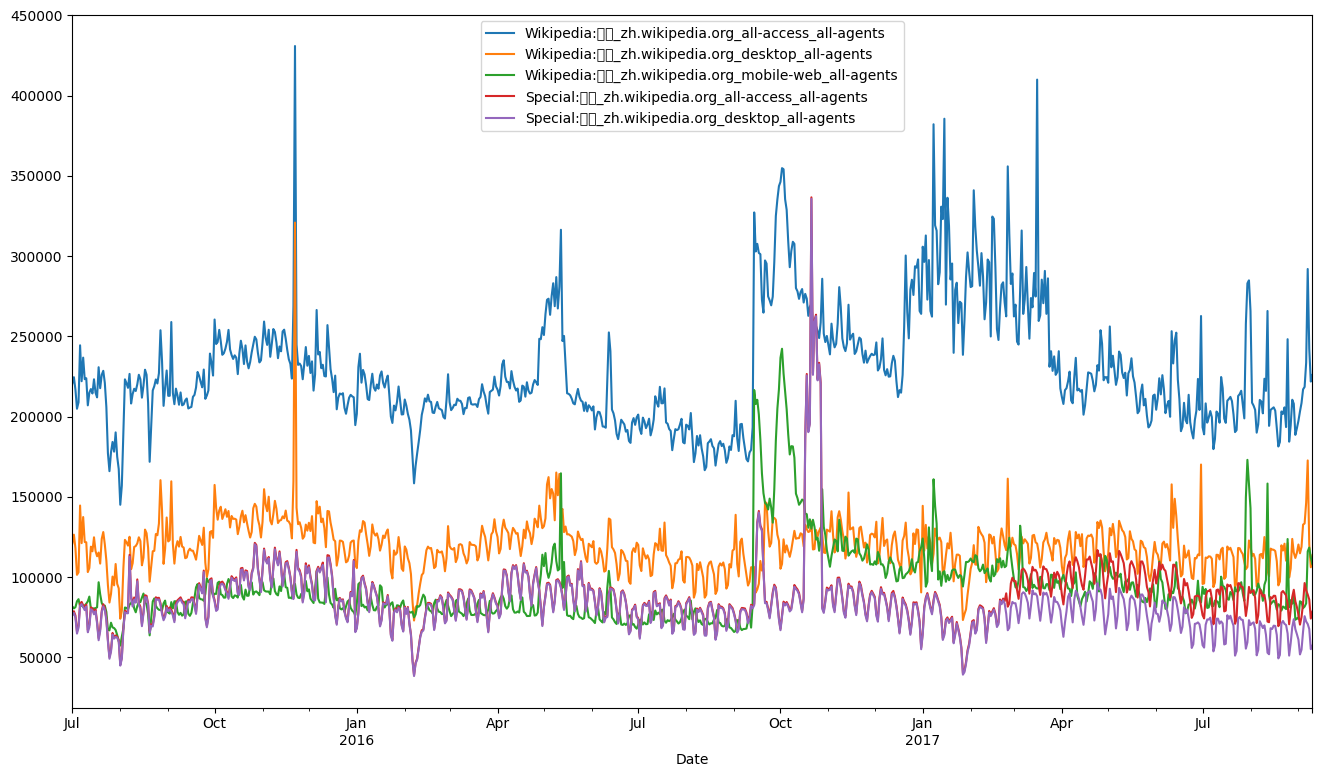

In [62]:
df[top_pages_zh.index].plot(figsize = (16,9))

In [63]:
commons_wikipedia_org_columns = [column for column in df.columns if "commons.wikimedia.org" in column]

top_pages_commons = df[commons_wikipedia_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_commons

Special:CreateAccount_commons.wikimedia.org_all-access_all-agents    265564.856522
Special:CreateAccount_commons.wikimedia.org_desktop_all-agents       237206.436957
Special:Search_commons.wikimedia.org_all-access_all-agents           121638.339975
Special:Search_commons.wikimedia.org_desktop_all-agents              110171.231631
Main_Page_commons.wikimedia.org_all-access_all-agents                104428.801993
dtype: object

<Axes: xlabel='Date'>

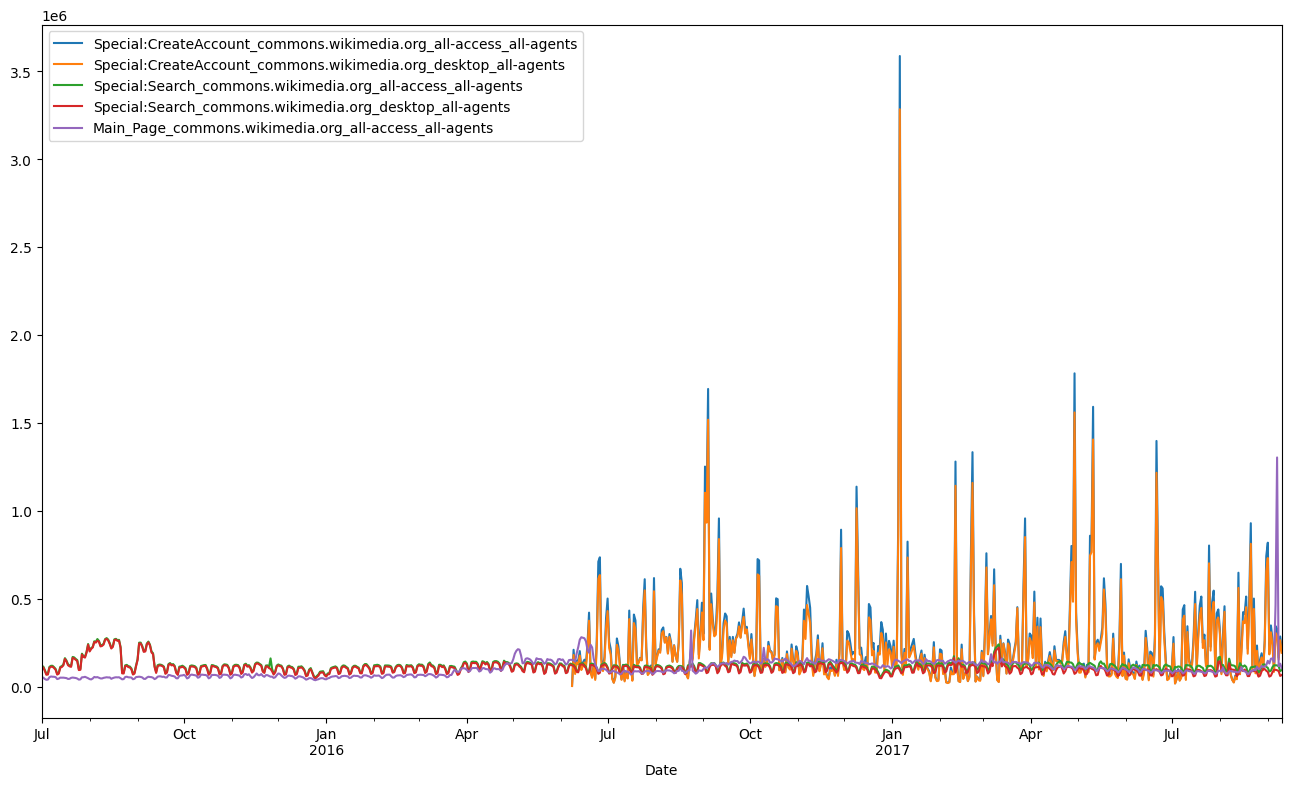

In [64]:
df[top_pages_commons.index].plot(figsize = (16,9))

In [65]:
mediawiki_org_columns = [column for column in df.columns if "www.mediawiki.org" in column]

top_pages_mediawiki = df[mediawiki_org_columns].mean().sort_values(ascending = False)[0:5]
top_pages_mediawiki

MediaWiki_www.mediawiki.org_all-access_all-agents                               37254.422167
MediaWiki_www.mediawiki.org_desktop_all-agents                                  30106.356164
Special:CreateAccount_www.mediawiki.org_all-access_all-agents                   13567.505423
Special:CreateAccount_www.mediawiki.org_desktop_all-agents                      12897.624729
Special:MyLanguage/How_to_contribute_www.mediawiki.org_all-access_all-agents    11699.264012
dtype: object

<Axes: xlabel='Date'>

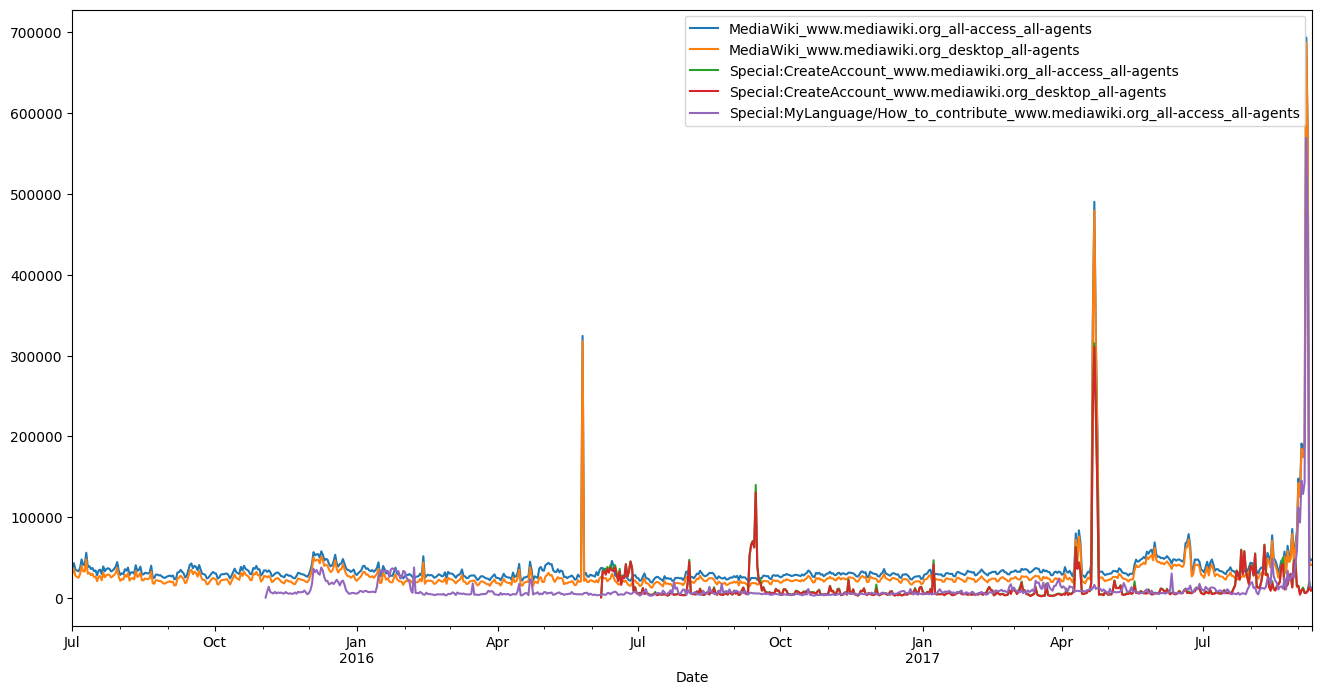

In [66]:
df[top_pages_mediawiki.index].plot(figsize = (16,8))